In [1]:
# 6.1.4
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# City codification
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [5]:
# API URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6619410f447cf07be3b81d2be533963b'

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Part 1 END
# Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):
#END part 2

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# END part 3
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | kodiak
Processing Record 2 of Set 12 | rawson
Processing Record 3 of Set 12 | porbandar
Processing Record 4 of Set 12 | pusad
Processing Record 5 of Set 12 | tuktoyaktuk
Processing Record 6 of Set 12 | port elizabeth
Processing Record 7 of Set 12 | holt
Processing Record 8 of Set 12 | klaksvik
Processing Record 9 of Set 12 | jamestown
Processing Record 10 of Set 12 | mataura
Processing Record 11 of Set 12 | hithadhoo
Processing Record 12 of Set 12 | rikitea
Processing Record 13 of Set 12 | mujiayingzi
Processing Record 14 of Set 12 | alofi
Processing Record 15 of Set 12 | kruisfontein
Processing Record 16 of Set 12 | namatanai
Processing Record 17 of Set 12 | nome
Processing Record 18 of Set 12 | saint anthony
Processing Record 19 of Set 12 | caravelas
Processing Record 20 of Set 12 | hofn
Processing Record 21 of Set 12 | port alfred
Processing Record 22 of Set 12 | marrakesh
Processing Record 2

Processing Record 37 of Set 15 | saint-francois
Processing Record 38 of Set 15 | coihaique
Processing Record 39 of Set 15 | henties bay
Processing Record 40 of Set 15 | bam
Processing Record 41 of Set 15 | mahebourg
Processing Record 42 of Set 15 | salalah
Processing Record 43 of Set 15 | port augusta
Processing Record 44 of Set 15 | port lincoln
Processing Record 45 of Set 15 | tiarei
Processing Record 46 of Set 15 | provideniya
Processing Record 47 of Set 15 | greenfield
Processing Record 48 of Set 15 | vardo
Processing Record 49 of Set 15 | nanning
Processing Record 50 of Set 15 | kuruman
Processing Record 1 of Set 16 | bengkulu
Processing Record 2 of Set 16 | chara
Processing Record 3 of Set 16 | sao jose da coroa grande
Processing Record 4 of Set 16 | kirakira
Processing Record 5 of Set 16 | peniche
Processing Record 6 of Set 16 | victoria
Processing Record 7 of Set 16 | olivenza
Processing Record 8 of Set 16 | kirensk
Processing Record 9 of Set 16 | takoradi
Processing Record 10 

City not found. Skipping...
Processing Record 21 of Set 19 | booue
Processing Record 22 of Set 19 | toliary
City not found. Skipping...
Processing Record 23 of Set 19 | pisco
Processing Record 24 of Set 19 | san jose
Processing Record 25 of Set 19 | luderitz
Processing Record 26 of Set 19 | hidalgo
Processing Record 27 of Set 19 | sandpoint
Processing Record 28 of Set 19 | buzuluk
Processing Record 29 of Set 19 | paamiut
Processing Record 30 of Set 19 | dingle
Processing Record 31 of Set 19 | ibra
Processing Record 32 of Set 19 | ankara
Processing Record 33 of Set 19 | begowal
Processing Record 34 of Set 19 | anzhero-sudzhensk
Processing Record 35 of Set 19 | catamarca
Processing Record 36 of Set 19 | huilong
Processing Record 37 of Set 19 | chom bung
City not found. Skipping...
Processing Record 38 of Set 19 | daru
Processing Record 39 of Set 19 | ilulissat
Processing Record 40 of Set 19 | chaumont
Processing Record 41 of Set 19 | sibu
Processing Record 42 of Set 19 | touros
Processin

Processing Record 8 of Set 23 | asau
Processing Record 9 of Set 23 | emerald
Processing Record 10 of Set 23 | gari
Processing Record 11 of Set 23 | miri
Processing Record 12 of Set 23 | yarmouth
Processing Record 13 of Set 23 | pochutla
Processing Record 14 of Set 23 | atlantis
Processing Record 15 of Set 23 | leningradskiy
Processing Record 16 of Set 23 | verkhnyaya inta
Processing Record 17 of Set 23 | shache
Processing Record 18 of Set 23 | sulangan
Processing Record 19 of Set 23 | santa vitoria do palmar
Processing Record 20 of Set 23 | kuche
City not found. Skipping...
Processing Record 21 of Set 23 | chapais
Processing Record 22 of Set 23 | solnechnyy
Processing Record 23 of Set 23 | tuzser
Processing Record 24 of Set 23 | placido de castro
Processing Record 25 of Set 23 | kirksville
Processing Record 26 of Set 23 | high level
Processing Record 27 of Set 23 | xam nua
Processing Record 28 of Set 23 | lufilufi
Processing Record 29 of Set 23 | bahia blanca
Processing Record 30 of Se

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,33.80,80,1,2.84,US,2021-02-03 22:16:23
1,Rawson,-43.3002,-65.1023,84.09,24,74,8.08,AR,2021-02-03 22:16:23
2,Porbandar,21.6422,69.6093,64.76,79,0,7.85,IN,2021-02-03 22:16:23
3,Pusad,19.9000,77.5833,63.01,29,0,3.22,IN,2021-02-03 22:16:24
4,Tuktoyaktuk,69.4541,-133.0374,-40.00,67,20,5.75,CA,2021-02-03 22:16:24
5,Port Elizabeth,-33.9180,25.5701,68.00,94,40,10.36,ZA,2021-02-03 22:13:38
6,Holt,42.6406,-84.5153,33.80,51,1,5.75,US,2021-02-03 22:16:24
7,Klaksvik,62.2266,-6.5890,32.00,74,25,5.75,FO,2021-02-03 22:16:24
8,Jamestown,42.0970,-79.2353,28.99,74,1,12.66,US,2021-02-03 22:16:25
9,Mataura,-46.1927,168.8643,56.62,53,41,6.96,NZ,2021-02-03 22:16:25


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
#### 6.3.1

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

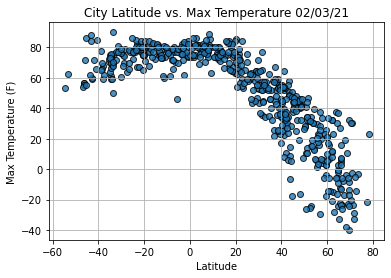

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

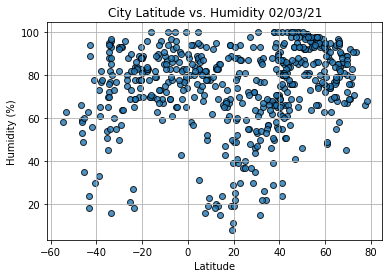

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

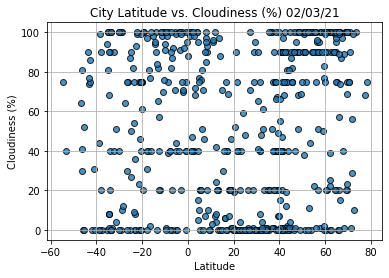

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

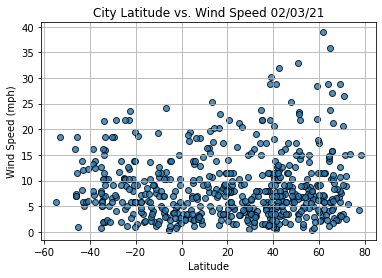

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [22]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [23]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

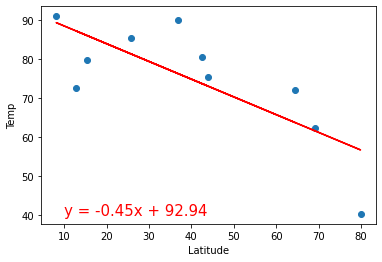

In [24]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [32]:
#city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,33.80,80,1,2.84,US,2021-02-03 22:16:23
2,Porbandar,21.6422,69.6093,64.76,79,0,7.85,IN,2021-02-03 22:16:23
3,Pusad,19.9000,77.5833,63.01,29,0,3.22,IN,2021-02-03 22:16:24
4,Tuktoyaktuk,69.4541,-133.0374,-40.00,67,20,5.75,CA,2021-02-03 22:16:24
6,Holt,42.6406,-84.5153,33.80,51,1,5.75,US,2021-02-03 22:16:24


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

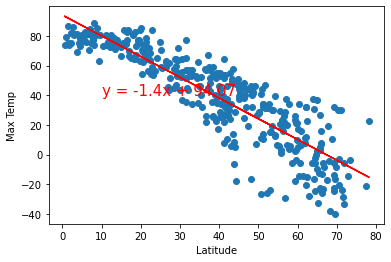

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


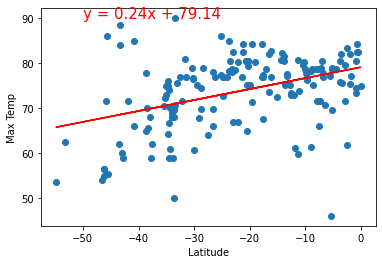

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


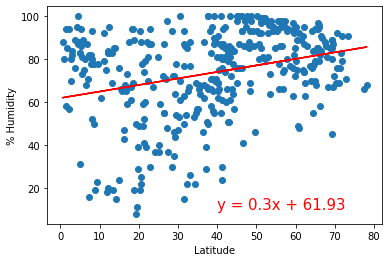

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

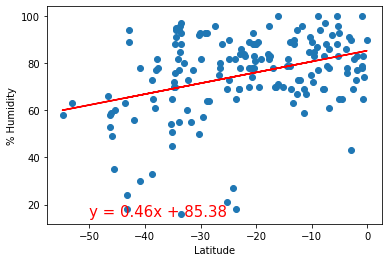

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

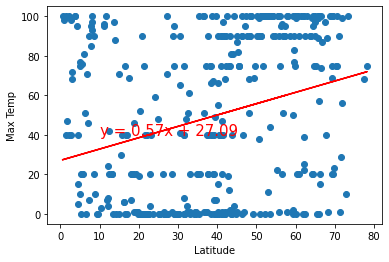

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Max Temp',(10,40))

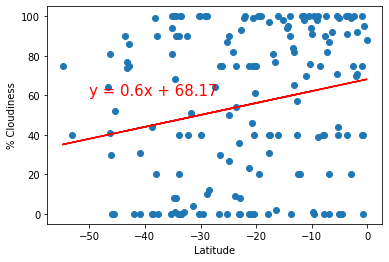

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


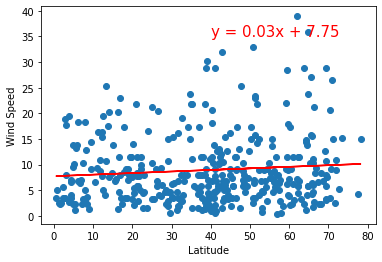

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))


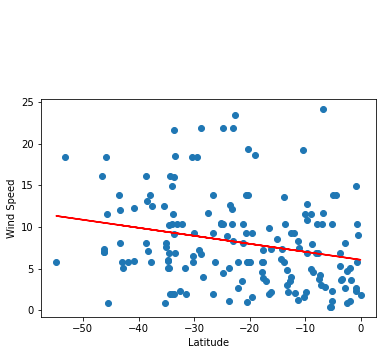

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))